## Étape 3 : Elaborez un modèle de clustering

### 3.1 Réaliser un Notebook avec Simulations d'Algorithmes de Clustering

#### 3.1.1 Exemple avec K-means

Voici un exemple de mise en œuvre du clustering avec l'algorithme K-means :

### Clustering avec les variables rfm et review_score

In [72]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Charger les données
rfm_review = pd.read_csv('rfm_review.csv')

In [117]:
# Encoder la colonne 'customer_id' avec LabelEncoder
label_encoder = LabelEncoder()
rfm_review['customer_id_encoded'] = label_encoder.fit_transform(rfm_review['customer_id'])

In [119]:
# Sélection des colonnes RFM_review pour le clustering
X_review = rfm_review[['recency', 'frequency', 'monetary', 'average_review_score']]

In [121]:
# Standardiser les données
scaler = StandardScaler()
X_review_scaled = scaler.fit_transform(X_review)

In [123]:
# Appliquer KMeans avec un nombre de clusters initial (par exemple, 4)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_review_scaled)

In [125]:
# Ajouter les labels de cluster au DataFrame
rfm_review['cluster'] = clusters

In [127]:
# Calculer les moyennes des features pour chaque cluster en ne gardant que les colonnes numériques
numeric_columns = rfm_review.select_dtypes(include=[np.number]).columns
cluster_means = rfm_review.groupby('cluster')[numeric_columns].mean()
print(cluster_means)

            recency  frequency    monetary  average_review_score  \
cluster                                                            
0        173.224422   1.060839  115.460971              4.709917   
1        444.077128   1.071604  117.197652              4.643434   
2        287.077595   2.954505  669.748823              3.735887   
3        280.513354   1.157159  125.299472              1.742136   

         customer_id_encoded  cluster  
cluster                                
0               47958.835424      0.0  
1               48047.581757      1.0  
2               47756.571764      2.0  
3               47559.618525      3.0  


In [86]:
# Optionnel : Calculer le score de silhouette pour évaluer la qualité du clustering  
silhouette_avg = silhouette_score(X_review_scaled, clusters)
print(f'Score de silhouette: {silhouette_avg}')

Score de silhouette: 0.36174513106219697


C:\Users\SOUKA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\SOUKA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\SOUKA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\SOUKA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

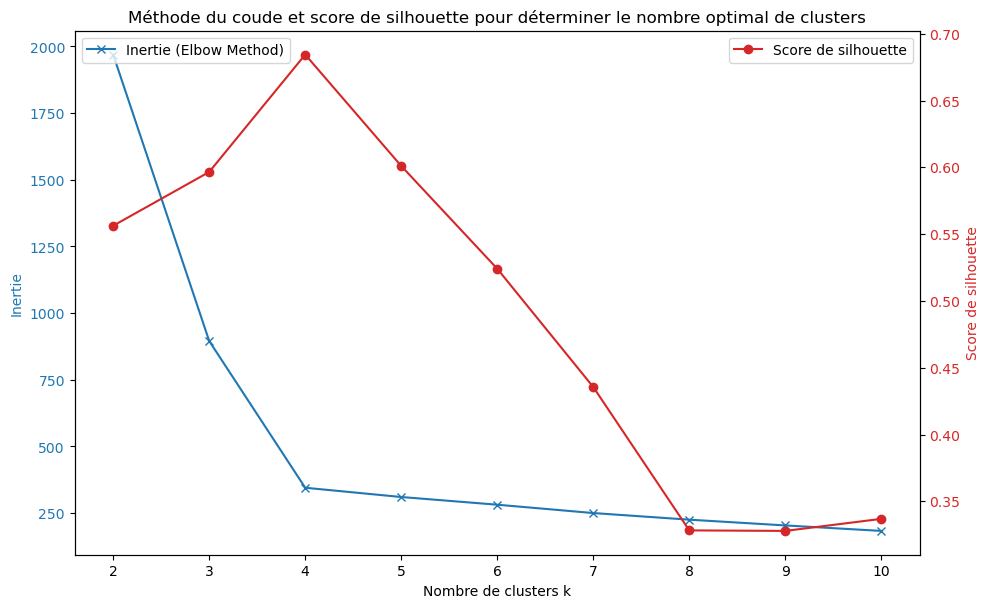

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Générer des données de test
X_review, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0)

# Calculer l'inertie et le score de silhouette pour différentes valeurs de k
inertia = []
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_review)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_review, kmeans.labels_))

# Créer un graphique avec deux axes y
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Nombre de clusters k')
ax1.set_ylabel('Inertie', color=color)
ax1.plot(K, inertia, 'bx-', color=color, label='Inertie (Elbow Method)')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instancier un second axe y qui partage le même axe x
color = 'tab:red'
ax2.set_ylabel('Score de silhouette', color=color)  
ax2.plot(K, silhouette_scores, 'ro-', color=color, label='Score de silhouette')
ax2.tick_params(axis='y', labelcolor=color)

# Ajouter les légendes
fig.tight_layout()  
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Méthode du coude et score de silhouette pour déterminer le nombre optimal de clusters')

# Enregistrer la figure sous format d'image (par exemple, PNG)
plt.savefig('coude_silhouette_nb_clusters_kmeans.png', bbox_inches='tight')
plt.show()

In [90]:
# Appliquer KMeans avec le nombre optimal de clusters basé sur la méthode du coude et le score de silhouette
optimal_clusters = 3  # Par exemple, vous pouvez ajuster en fonction du plot de la méthode du coude
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_review_scaled)

In [92]:
# Ajouter les labels de cluster optimaux au DataFrame
rfm_review['cluster'] = clusters

In [94]:
# Interprétation des Clusters
# Analyse des clusters
# Recalculer les moyennes des features pour chaque cluster avec le nombre optimal de clusters
cluster_means = rfm_review.groupby('cluster')[numeric_columns].mean()
print(cluster_means)

            recency  frequency    monetary  average_review_score  \
cluster                                                            
0        175.638361   1.071415  123.733502              4.620140   
1        282.509529   1.547984  204.572122              1.594243   
2        440.868850   1.086220  128.131363              4.586757   

         customer_id_encoded  cluster  
cluster                                
0               47907.410328      0.0  
1               47641.335430      1.0  
2               48038.137375      2.0  


In [96]:
# Caractériser les clusters
for cluster in range(optimal_clusters):
    print(f"Cluster {cluster}:")
    print(rfm_review[rfm_review['cluster'] == cluster][numeric_columns].describe())

Cluster 0:
            recency     frequency      monetary  average_review_score  \
count  46475.000000  46475.000000  46475.000000          46475.000000   
mean     175.638361      1.071415    123.733502              4.620140   
std       73.228317      0.283680    158.274812              0.627303   
min       49.103947      1.000000      0.850000              3.000000   
25%      112.244433      1.000000     44.900000              4.000000   
50%      175.082257      1.000000     81.990000              5.000000   
75%      238.942951      1.000000    144.900000              5.000000   
max      310.083403      4.000000   2470.500000              5.000000   

       customer_id_encoded  cluster  
count         46475.000000  46475.0  
mean          47907.410328      0.0  
std           27678.410942      0.0  
min               4.000000      0.0  
25%           23896.000000      0.0  
50%           47926.000000      0.0  
75%           71820.000000      0.0  
max           95830.000000 

In [ ]:
# Justification et Évaluation du Clustering
#Calcul du score de silhouette, d'indice de Davies-Bouldin et d'indice de Calinski-Harabasz pour le modèle final

In [99]:
# On a déterminé qu'il y a  3 clusters optimals
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_review_scaled)

In [101]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

# Calculer les scores
silhouette_avg = silhouette_score(X_review_scaled, clusters)
davies_bouldin_avg = davies_bouldin_score(X_review_scaled, clusters)
calinski_harabasz_avg = calinski_harabasz_score(X_review_scaled, clusters)

# Afficher les scores
print(f"Score de silhouette pour kmeans : {silhouette_avg}")
print(f"Indice de Davies-Bouldin pour kmeans: {davies_bouldin_avg}")
print(f"Indice de Calinski-Harabasz pour kmeans: {calinski_harabasz_avg}")

Score de silhouette pour kmeans : 0.33140126797059993
Indice de Davies-Bouldin pour kmeans: 1.1707355555145726
Indice de Calinski-Harabasz pour kmeans: 26900.156828954365


In [ ]:
# Visualisation des Clusters
# Visualisation des clusters en 2D

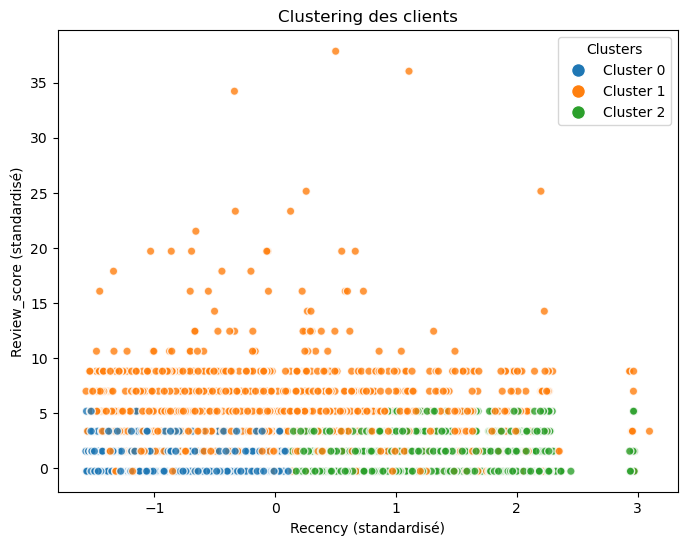

In [103]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Définir une palette de couleurs discrète pour 3 classes
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Bleu, Orange, Vert
cmap = ListedColormap(colors)

# Visualisation des clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_review_scaled[:, 0], X_review_scaled[:, 1], c=clusters, cmap=cmap, alpha=0.8, edgecolors='w')
plt.title('Clustering des clients')
plt.xlabel('Recency (standardisé)')
plt.ylabel('Review_score (standardisé)')

# Remplacement de la barre de couleurs continue par une légende discrète
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Cluster {i}')
           for i, color in enumerate(colors)]
plt.legend(handles=handles, title='Clusters')

plt.show()

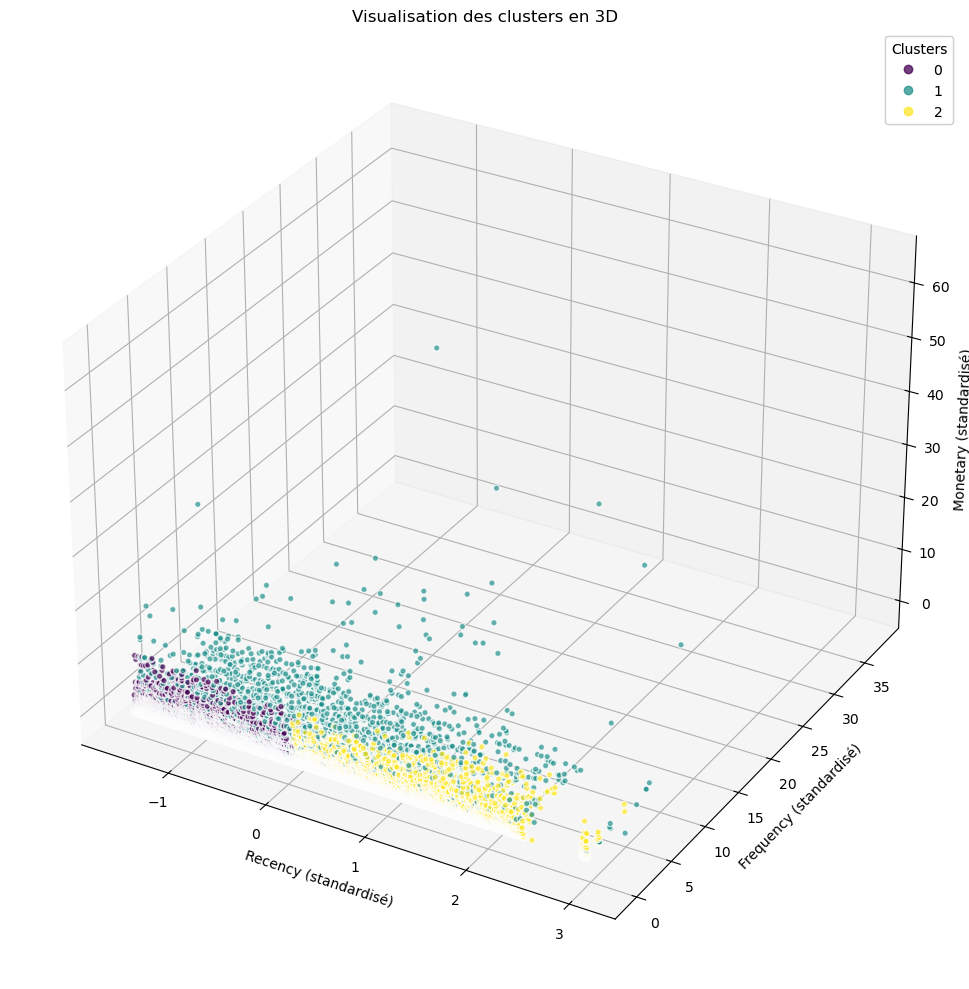

In [115]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assurez-vous que `clusters` contient les labels de cluster pour chaque point
clusters = rfm_review['cluster'].values  # Ou la variable contenant vos labels de cluster

# Visualisation 3D des clusters avec couleur représentant les clusters
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Mapper les clusters à une couleur
scatter = ax.scatter(X_review_scaled[:, 0], X_review_scaled[:, 1], X_review_scaled[:, 2], 
                     c=clusters, cmap='viridis', alpha=0.7, edgecolor='w')

# Ajouter des étiquettes et un titre
ax.set_title('Visualisation des clusters en 3D')
ax.set_xlabel('Recency (standardisé)')
ax.set_ylabel('Frequency (standardisé)')
ax.set_zlabel('Monetary (standardisé)')

# Ajouter une légende pour les clusters
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Ajuster le layout pour éviter les chevauchements
plt.tight_layout()
plt.savefig('visual_clusterskmeans_3D.png', bbox_inches='tight')
plt.show()


## clustering en choisissant que les variables rfm

In [149]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Charger les données
rfm = pd.read_csv('rfm_results.csv')

In [151]:
# Encoder la colonne 'customer_id' avec LabelEncoder
label_encoder = LabelEncoder()
rfm['customer_id_encoded'] = label_encoder.fit_transform(rfm['customer_id'])

In [153]:
# Sélection des colonnes RFM pour le clustering
X = rfm[['recency', 'frequency', 'monetary']]

In [155]:
# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [157]:
# Appliquer KMeans avec un nombre de clusters initial (par exemple, 4)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [158]:
# Ajouter les labels de cluster au DataFrame
rfm['cluster'] = clusters

In [161]:
# Calculer les moyennes des features pour chaque cluster en ne gardant que les colonnes numériques
numeric_columns = rfm.select_dtypes(include=[np.number]).columns
cluster_means = rfm.groupby('cluster')[numeric_columns].mean()
print(cluster_means)

            recency  frequency     monetary  customer_id_encoded  cluster
cluster                                                                  
0        437.489625   1.080256   111.184729         48245.560573      0.0
1        285.014903   3.824330   264.403604         47311.127553      1.0
2        178.103459   1.077102   110.876763         48270.137822      2.0
3        287.650151   1.126058  1133.450602         48283.042803      3.0


In [163]:
# Optionnel : Calculer le score de silhouette pour évaluer la qualité du clustering  
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Score de silhouette: {silhouette_avg}')

Score de silhouette: 0.4369342082271102


C:\Users\SOUKA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\SOUKA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\SOUKA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\SOUKA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

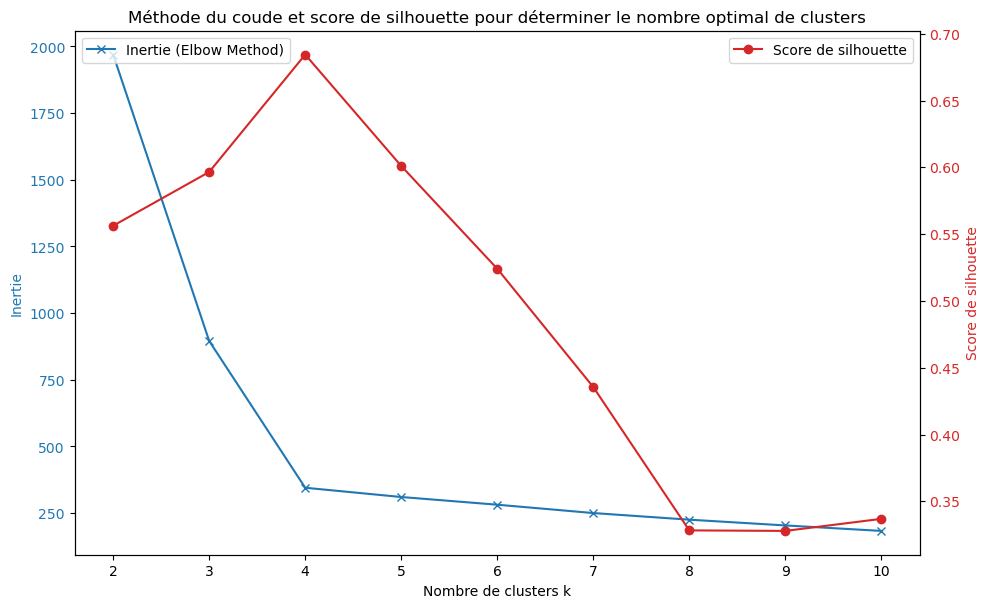

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Générer des données de test
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0)

# Calculer l'inertie et le score de silhouette pour différentes valeurs de k
inertia = []
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Créer un graphique avec deux axes y
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Nombre de clusters k')
ax1.set_ylabel('Inertie', color=color)
ax1.plot(K, inertia, 'bx-', color=color, label='Inertie (Elbow Method)')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instancier un second axe y qui partage le même axe x
color = 'tab:red'
ax2.set_ylabel('Score de silhouette', color=color)  
ax2.plot(K, silhouette_scores, 'ro-', color=color, label='Score de silhouette')
ax2.tick_params(axis='y', labelcolor=color)

# Ajouter les légendes
fig.tight_layout()  
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Méthode du coude et score de silhouette pour déterminer le nombre optimal de clusters')

# Enregistrer la figure sous format d'image (par exemple, PNG)
plt.savefig('coude_silhouette_nb_clusters_kmeans.png', bbox_inches='tight')
plt.show()

In [19]:
# . Inertie intra-cluster (pour K-means) pour évaluer la qualité du clustering
# L'inertie intra-cluster mesure la somme des distances au carré des points aux centres de leurs clusters respectifs. Une faible inertie indique des clusters compacts.
kmeans_inertia = kmeans.inertia_
print(f'Inertie intra-cluster pour K-means: {kmeans_inertia}')

Inertie intra-cluster pour K-means: 183.32748634432588


In [167]:
# Appliquer KMeans avec le nombre optimal de clusters basé sur la méthode du coude et le score de silhouette
optimal_clusters = 3  # Par exemple, vous pouvez ajuster en fonction du plot de la méthode du coude
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [169]:
# Ajouter les labels de cluster optimaux au DataFrame
rfm['cluster'] = clusters

In [171]:
# Interprétation des Clusters
# Analyse des clusters
# Recalculer les moyennes des features pour chaque cluster avec le nombre optimal de clusters
cluster_means = rfm.groupby('cluster')[numeric_columns].mean()
print(cluster_means)

            recency  frequency    monetary  customer_id_encoded  cluster
cluster                                                                 
0        438.033309   1.075564  115.390335         48236.505109      0.0
1        178.185097   1.072056  113.997170         48243.792917      1.0
2        283.454410   2.735508  658.121867         48187.772647      2.0


In [173]:
# Caractériser les clusters
for cluster in range(optimal_clusters):
    print(f"Cluster {cluster}:")
    print(rfm[rfm['cluster'] == cluster][numeric_columns].describe())

Cluster 0:
            recency     frequency      monetary  customer_id_encoded  cluster
count  39437.000000  39437.000000  39437.000000         39437.000000  39437.0
mean     438.033309      1.075564    115.390335         48236.505109      0.0
std       95.519413      0.264398    115.234557         27820.964714      0.0
min      306.863785      1.000000      2.290000             0.000000      0.0
25%      351.162789      1.000000     44.990000         24196.000000      0.0
50%      425.995787      1.000000     79.980000         48173.000000      0.0
75%      511.680509      1.000000    142.000000         72362.000000      0.0
max      744.323241      3.000000    949.990000         96477.000000      0.0
Cluster 1:
            recency     frequency      monetary  customer_id_encoded  cluster
count  53056.000000  53056.000000  53056.000000         53056.000000  53056.0
mean     178.185097      1.072056    113.997170         48243.792917      1.0
std       72.798390      0.258583    110.1

### 3.1.4 Justification et Évaluation du Clustering
Calcul du score de silhouette, d'indice de Davies-Bouldin et d'indice de Calinski-Harabasz pour le modèle final

In [175]:
# On a déterminé qu'il y a  3 clusters optimals
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [177]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

# Calculer les scores
silhouette_avg = silhouette_score(X_scaled, clusters)
davies_bouldin_avg = davies_bouldin_score(X_scaled, clusters)
calinski_harabasz_avg = calinski_harabasz_score(X_scaled, clusters)

# Afficher les scores
print(f"Score de silhouette pour kmeans : {silhouette_avg}")
print(f"Indice de Davies-Bouldin pour kmeans: {davies_bouldin_avg}")
print(f"Indice de Calinski-Harabasz pour kmeans: {calinski_harabasz_avg}")

Score de silhouette pour kmeans : 0.41899498203465485
Indice de Davies-Bouldin pour kmeans: 1.1043182730643832
Indice de Calinski-Harabasz pour kmeans: 38018.92358603181


** Conclusion **
  *******

RFM avec review_score :
Score de silhouette pour kmeans : 0.33140126797059993
Indice de Davies-Bouldin pour kmeans: 1.1707355555145726
Indice de Calinski-Harabasz pour kmeans: 26900.1568289543

RFM sans review score

Score de silhouette pour kmeans : 0.41899498203465485
Indice de Davies-Bouldin pour kmeans: 1.1043182730643832
Indice de Calinski-Harabasz pour kmeans: 38018.923586031
8165
En comprant les résultats des métriques de qual'ité score de silhou'et'te, Coefficien de Davies-Bou'ldin' et index Calinski-Hara'basz, on peut déduire que le fait d'ajouter la feature review_score diminue la qualité du clustering pour K-m, avec un score de silhouette et indice de eans

### 3.1.5 Visualisation des Clusters
Visualisation des clusters en 2D

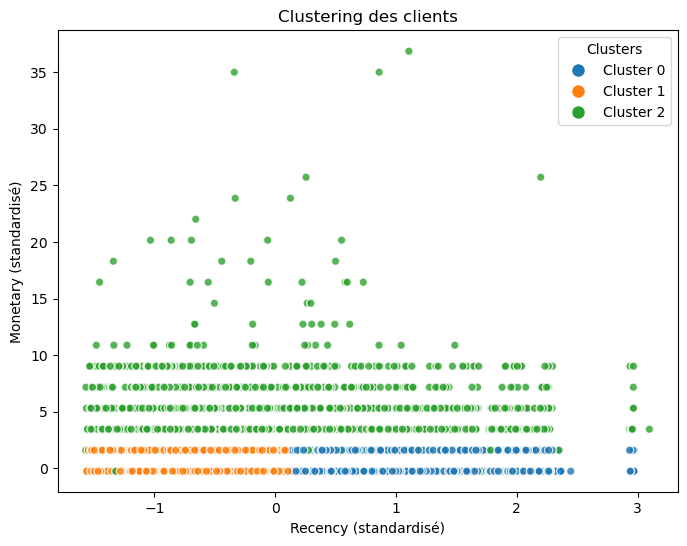

In [70]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Définir une palette de couleurs discrète pour 3 classes
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Bleu, Orange, Vert
cmap = ListedColormap(colors)

# Visualisation des clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=cmap, alpha=0.8, edgecolors='w')
plt.title('Clustering des clients')
plt.xlabel('Recency (standardisé)')
plt.ylabel('Monetary (standardisé)')

# Remplacement de la barre de couleurs continue par une légende discrète
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Cluster {i}')
           for i, color in enumerate(colors)]
plt.legend(handles=handles, title='Clusters')

plt.show()

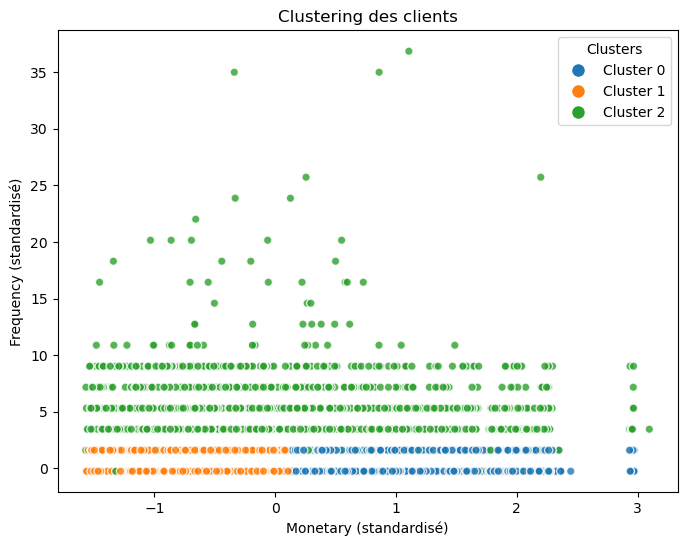

In [71]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Définir une palette de couleurs discrète pour 3 classes
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Bleu, Orange, Vert
cmap = ListedColormap(colors)

# Visualisation des clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=cmap, alpha=0.8, edgecolors='w')
plt.title('Clustering des clients')
plt.xlabel('Monetary (standardisé)')
plt.ylabel('Frequency (standardisé)')

# Remplacement de la barre de couleurs continue par une légende discrète
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Cluster {i}')
           for i, color in enumerate(colors)]
plt.legend(handles=handles, title='Clusters')

plt.show()

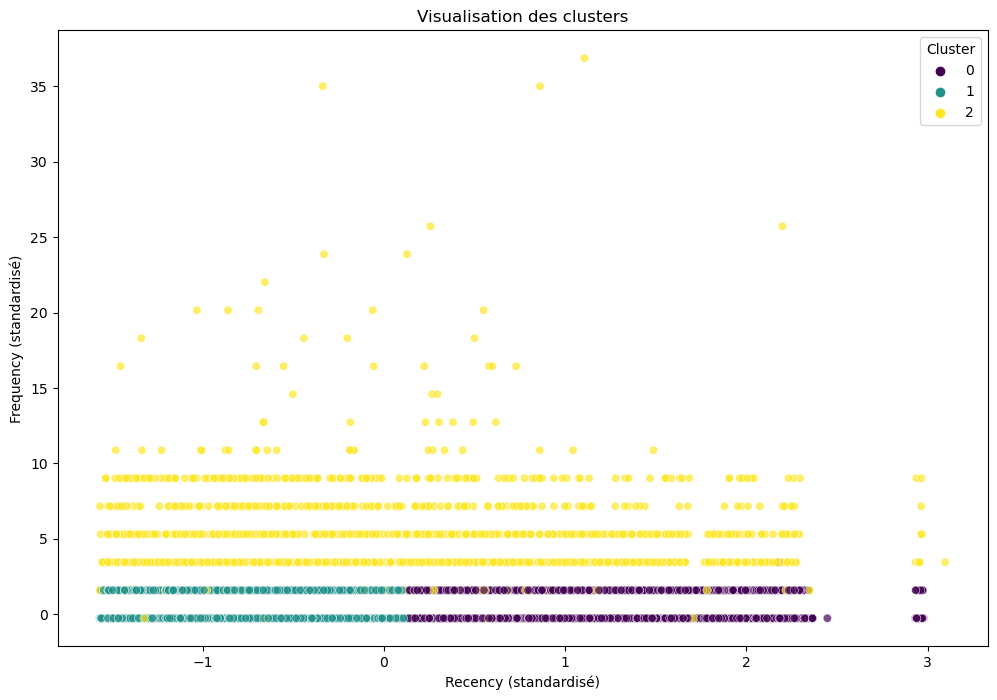

In [72]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='viridis', alpha=0.7, edgecolor='w')
plt.title('Visualisation des clusters')
plt.xlabel('Recency (standardisé)')
plt.ylabel('Frequency (standardisé)')
plt.legend(title='Cluster')
# Enregistrer la figure sous format d'image (par exemple, PNG)
plt.savefig('visualisation_clusters_2D.png', bbox_inches='tight')
plt.show()

Visualisation des clusters en 3D

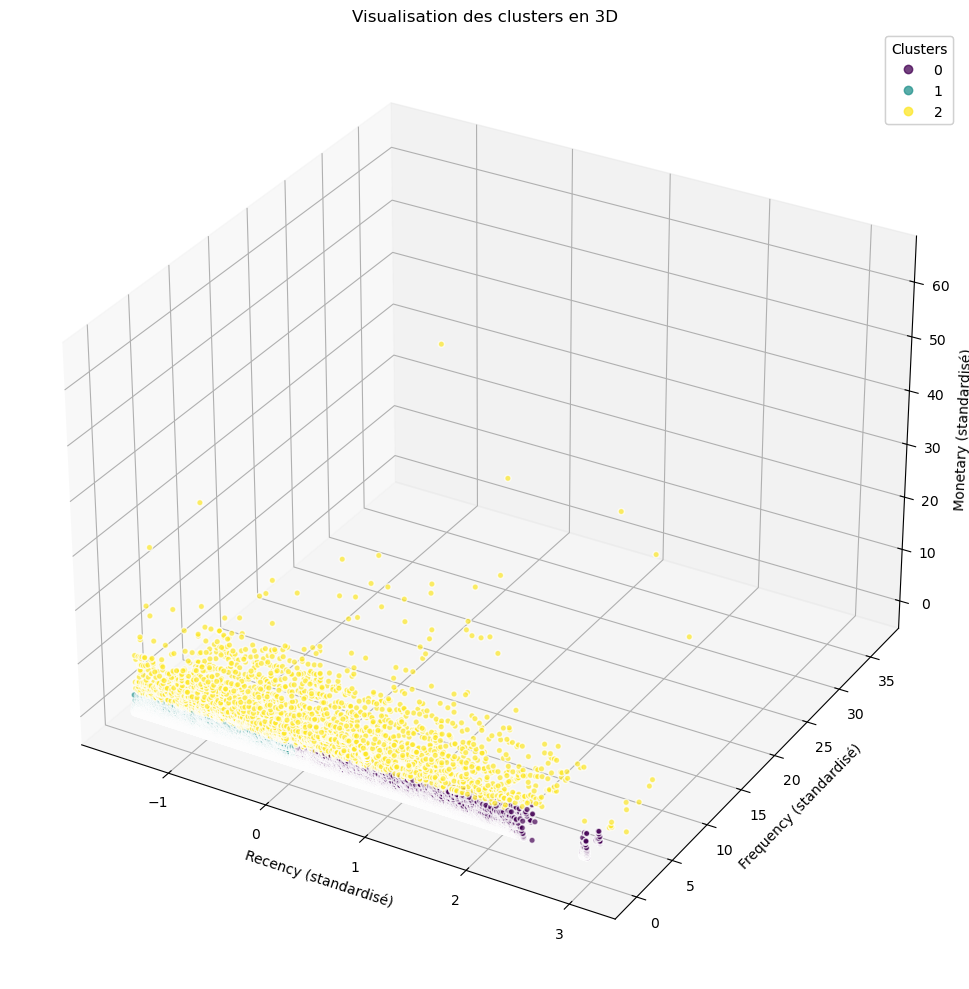

In [88]:
from mpl_toolkits.mplot3d import Axes3D
# Visualisation 3D des clusters
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Mapper les clusters à une couleur
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=clusters, cmap='viridis', alpha=0.7, edgecolor='w')

# Ajouter des étiquettes et un titre
ax.set_title('Visualisation des clusters en 3D')
ax.set_xlabel('Recency (standardisé)')
ax.set_ylabel('Frequency (standardisé)')
ax.set_zlabel('Monetary (standardisé)')

# Ajouter une légende
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
# Ajuster le layout pour éviter les chevauchements
plt.tight_layout()
plt.savefig('visual_clusterskmeans_3D.png', bbox_inches='tight')
plt.show()

### Utilisation de la PCA pour visualiser les clusters formés par le modèle K-means

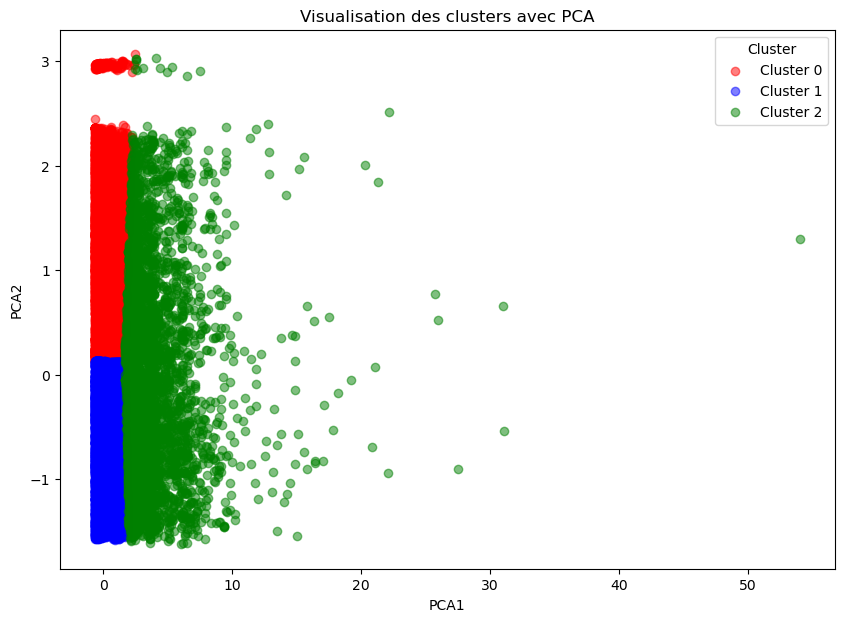

In [158]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer PCA pour réduire les dimensions à 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Appliquer K-means sur les données réduites
kmeans = KMeans(n_clusters=3, random_state=42)  # Choisissez le nombre de clusters approprié
kmeans_labels = kmeans.fit_predict(X_pca)

# Créer un DataFrame pour les données PCA avec les clusters
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = kmeans_labels

# Liste des couleurs distinctes pour chaque cluster
colors = ['red', 'blue', 'green']

# Visualiser les clusters sans échelle de couleurs
plt.figure(figsize=(10, 7))

for i in range(len(set(kmeans_labels))):
    plt.scatter(pca_df[pca_df['cluster'] == i]['PCA1'], pca_df[pca_df['cluster'] == i]['PCA2'], 
                color=colors[i], label=f'Cluster {i}', alpha=0.5)

plt.title('Visualisation des clusters avec PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# Ajouter une légende pour identifier les clusters
plt.legend(title='Cluster')
plt.show()

### Utilisation de t-sne aprs PCA pour visualiser les clusters formés par le modèle K-means

In [29]:

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réduction de la dimensionnalité à 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Clustering K-means avec les données réduites
kmeans = KMeans(n_clusters=3, random_state=42)  # Choisissez le nombre de clusters approprié
kmeans_labels = kmeans.fit_predict(X_pca)

# Calcul des métriques de qualité du clustering
kmeans_db_score = davies_bouldin_score(X_pca, kmeans_labels)
kmeans_ch_score = calinski_harabasz_score(X_pca, kmeans_labels)
kmeans_silhouette_score = silhouette_score(X_pca, kmeans_labels)

print(f'Coefficient de Davies-Bouldin pour K-means: {kmeans_db_score}')
print(f'Index de Calinski-Harabasz pour K-means: {kmeans_ch_score}')
print(f'Score de silhouette pour K-means: {kmeans_silhouette_score}')

Coefficient de Davies-Bouldin pour K-means: 0.7279700322644947
Index de Calinski-Harabasz pour K-means: 76435.97588748336
Score de silhouette pour K-means: 0.4780712675031295


C:\Users\SOUKA\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\SOUKA\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\SOUKA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


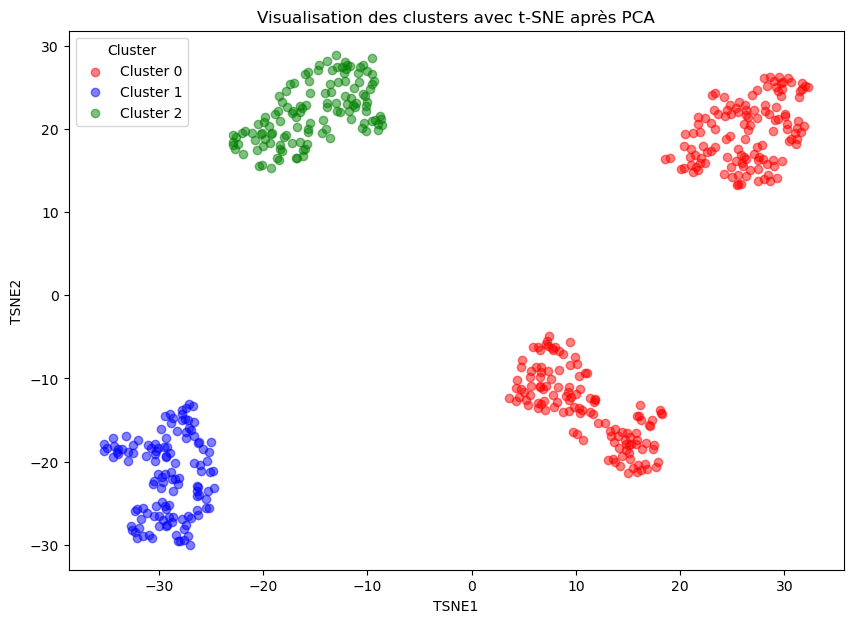

In [154]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer PCA pour réduire les dimensions à 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Appliquer t-SNE pour obtenir une visualisation plus détaillée
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Appliquer K-means sur les données réduites par t-SNE
kmeans = KMeans(n_clusters=3, random_state=42)  # Choisissez le nombre de clusters approprié
kmeans_labels = kmeans.fit_predict(X_tsne)

# Créer un DataFrame pour les données t-SNE avec les clusters
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['cluster'] = kmeans_labels

# Liste des couleurs distinctes pour chaque cluster
colors = ['red', 'blue', 'green']

# Visualiser les clusters avec t-SNE
plt.figure(figsize=(10, 7))

for i in range(len(set(kmeans_labels))):
    plt.scatter(tsne_df[tsne_df['cluster'] == i]['TSNE1'], tsne_df[tsne_df['cluster'] == i]['TSNE2'], 
                color=colors[i], label=f'Cluster {i}', alpha=0.5)

plt.title('Visualisation des clusters avec t-SNE après PCA')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')

# Ajouter une légende pour identifier les clusters
plt.legend(title='Cluster')
plt.show()

### 3.2 clustering avec DBSCAN

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [3]:
# Charger les données
rfm = pd.read_csv('rfm_results.csv')

In [5]:
# Encoder la colonne 'customer_id' avec LabelEncoder
label_encoder = LabelEncoder()
rfm['customer_id_encoded'] = label_encoder.fit_transform(rfm['customer_id'])

In [7]:
# Sélection des colonnes RFM pour le clustering
X = rfm[['recency', 'frequency', 'monetary']]

In [9]:
# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

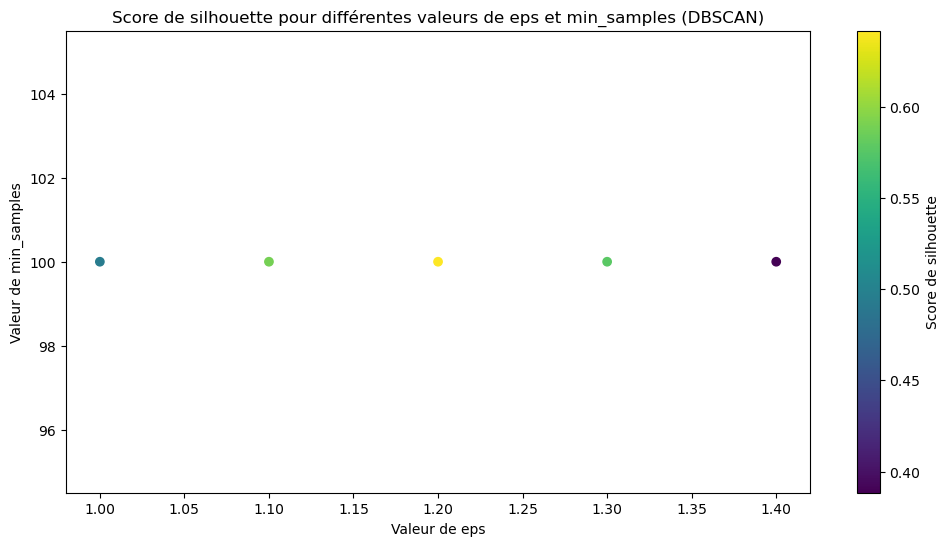

Best eps: 1.2000000000000002, Best min_samples: 100, Best silhouette score: 0.641695312705909


In [11]:
# Déterminer les meilleurs eps et min_samples

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Générer des données de test
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0)

# Calculer le score de silhouette pour différentes valeurs de eps et min_samples
silhouette_scores = []
eps_values = np.arange(0.1, 2.1, 0.1)
min_samples_values = [100]

# Initialiser les listes pour stocker les meilleures valeurs
best_eps = 0
best_min_samples = 0
best_score = -1

# Calculer les scores pour différentes combinaisons de eps et min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X)
        if len(set(clusters)) > 1 and -1 in clusters:
            score = silhouette_score(X, clusters)
            silhouette_scores.append((eps, min_samples, score))
            if score > best_score:
                best_eps = eps
                best_min_samples = min_samples
                best_score = score

# Convertir les résultats en tableau pour faciliter la visualisation
silhouette_scores = np.array(silhouette_scores)

# Créer un graphique avec les scores de silhouette pour différentes valeurs de eps et min_samples
fig, ax = plt.subplots(figsize=(12, 6))

scatter = ax.scatter(silhouette_scores[:, 0], silhouette_scores[:, 1], c=silhouette_scores[:, 2], cmap='viridis')
colorbar = plt.colorbar(scatter, ax=ax)
colorbar.set_label('Score de silhouette')

ax.set_xlabel('Valeur de eps')
ax.set_ylabel('Valeur de min_samples')
ax.set_title('Score de silhouette pour différentes valeurs de eps et min_samples (DBSCAN)')
plt.savefig('Score_silhouette_Méthode1', bbox_inches='tight')
plt.show()

print(f'Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best silhouette score: {best_score}')

Best eps: 1.2000000000000002, Best min_samples: 100, Best silhouette score: 0.641695312705909


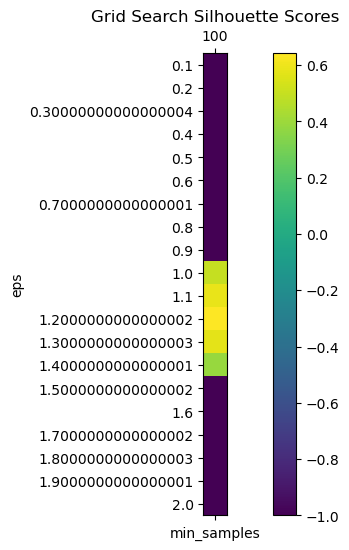

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClusterMixin

# Générer des données de test
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0)

# Créer une classe qui intègre DBSCAN pour permettre l'utilisation de GridSearchCV
class DBSCANWrapper(BaseEstimator, ClusterMixin):
    def __init__(self, eps=0.5, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples

    def fit(self, X, y=None):
        self.dbscan_ = DBSCAN(eps=self.eps, min_samples=self.min_samples)
        self.labels_ = self.dbscan_.fit_predict(X)
        return self

    def fit_predict(self, X, y=None):
        self.fit(X)
        return self.labels_

# Définir une fonction de scoring personnalisée qui n'utilise pas y_true
def silhouette_scorer(estimator, X):
    clusters = estimator.fit_predict(X)
    # Vérifier qu'il y a plus d'un cluster et que tous les points ne sont pas considérés comme du bruit (-1)
    if len(set(clusters)) > 1 and -1 in clusters:
        return silhouette_score(X, clusters)
    else:
        return -1  # Score faible si DBSCAN ne trouve pas de clusters appropriés

# Définir une grille de paramètres pour eps et min_samples
param_grid = {
    'eps': np.arange(0.1, 2.1, 0.1),
    'min_samples': [100]
}

# Configurer GridSearchCV avec la fonction de scoring personnalisée
grid_search = GridSearchCV(DBSCANWrapper(), param_grid, scoring=silhouette_scorer, cv=[(slice(None), slice(None))])

# Exécuter la recherche des meilleurs paramètres
grid_search.fit(X)

# Récupérer les meilleurs paramètres
best_eps = grid_search.best_params_['eps']
best_min_samples = grid_search.best_params_['min_samples']
best_score = grid_search.best_score_

# Afficher les résultats
print(f'Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best silhouette score: {best_score}')

# Visualiser les résultats sous forme de graphique
results = grid_search.cv_results_
scores = np.array(results['mean_test_score']).reshape(len(param_grid['eps']), len(param_grid['min_samples']))

fig, ax = plt.subplots(figsize=(12, 6))
cax = ax.matshow(scores, interpolation='nearest', cmap='viridis')
fig.colorbar(cax)

ax.set_xticks(np.arange(len(param_grid['min_samples'])))
ax.set_yticks(np.arange(len(param_grid['eps'])))

ax.set_xticklabels(param_grid['min_samples'])
ax.set_yticklabels(param_grid['eps'])

plt.xlabel('min_samples')
plt.ylabel('eps')
plt.title('Grid Search Silhouette Scores')
plt.savefig('Score_silhouette_gridsearch', bbox_inches='tight')
plt.show()

C:\Users\SOUKA\AppData\Local\Temp\ipykernel_13996\1075736602.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(eps_values, silhouette_scores, 'ro-', color='tab:red', label='Score de silhouette')


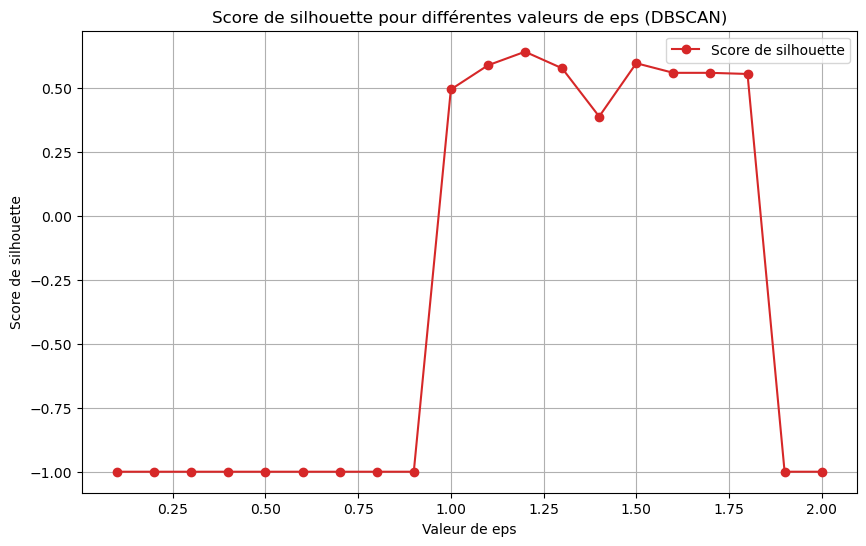

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Générer des données de test
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0)

# Calculer le score de silhouette pour différentes valeurs de eps
silhouette_scores = []
eps_values = np.arange(0.1, 2.1, 0.1)

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=100)
    clusters = dbscan.fit_predict(X)
    # Ignorer les cas où tous les points sont considérés comme du bruit
    if len(set(clusters)) > 1:
        silhouette_scores.append(silhouette_score(X, clusters))
    else:
        silhouette_scores.append(-1)  # Marquer comme score négatif pour les cas non valides

# Créer un graphique avec le score de silhouette pour différentes valeurs de eps
plt.figure(figsize=(10, 6))
plt.plot(eps_values, silhouette_scores, 'ro-', color='tab:red', label='Score de silhouette')
plt.xlabel('Valeur de eps')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette pour différentes valeurs de eps (DBSCAN)')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Appliquer DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=100)
clusters = dbscan.fit_predict(X_scaled)

In [19]:
# Ajouter les labels de cluster au DataFrame
rfm['cluster'] = clusters

In [21]:
# Afficher le nombre de clusters trouvés (en ignorant le bruit, qui a un label de -1)
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print(f'Nombre de clusters trouvés: {n_clusters}')

Nombre de clusters trouvés: 6


Score de silhouette moyen: 0.418


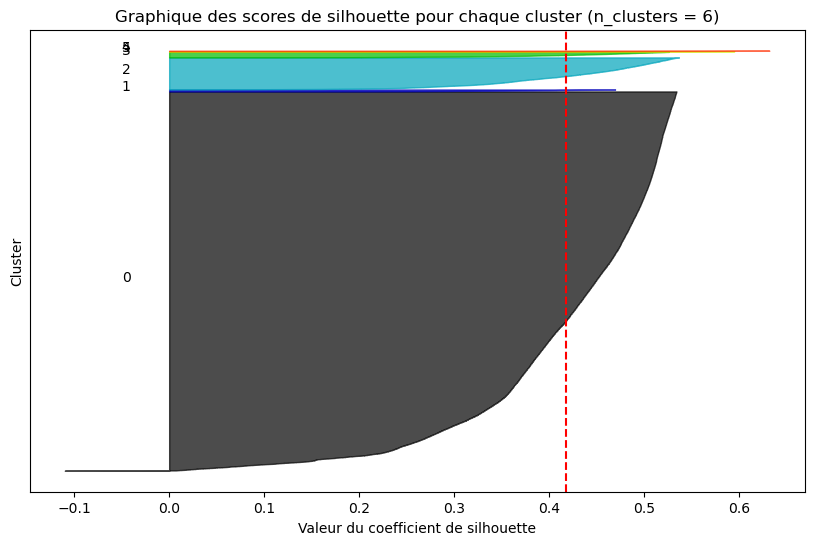

In [23]:
# évaluer la qualité de clustering avec DBSCAN 
# Calculer le score de silhouette (en ignorant le bruit, qui a un label de -1)
if n_clusters > 1:
    silhouette_avg = silhouette_score(X_scaled, clusters)
    print(f'Score de silhouette moyen: {silhouette_avg:.3f}')
    
    # Calculer les valeurs de silhouette pour chaque échantillon
    sample_silhouette_values = silhouette_samples(X_scaled, clusters)
    
    # Représenter graphiquement les scores de silhouette
    plt.figure(figsize=(10, 6))
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.title(f"Graphique des scores de silhouette pour chaque cluster (n_clusters = {n_clusters})")
    plt.xlabel("Valeur du coefficient de silhouette")
    plt.ylabel("Cluster")

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.yticks([])
    plt.show()
else:
    print("Le score de silhouette ne peut pas être calculé car il n'y a qu'un seul cluster ou aucun cluster détecté.")

C:\Users\SOUKA\AppData\Local\Temp\ipykernel_13996\804141706.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = [plt.cm.get_cmap('tab10')(each) for each in np.linspace(0, 1, len(unique_clusters))]


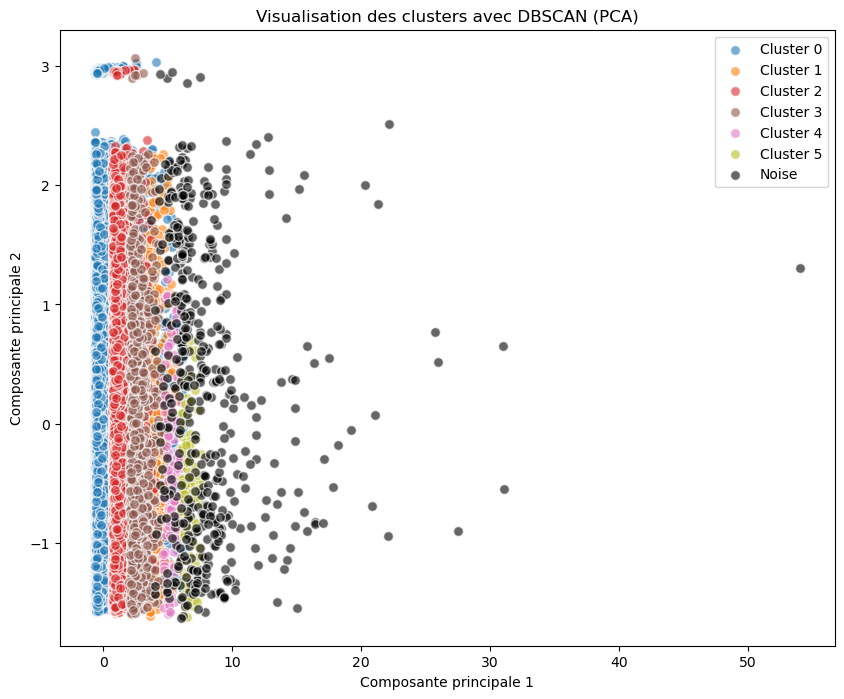

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Réduire les données à 2 dimensions avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Créer un scatter plot des clusters
plt.figure(figsize=(10, 8))
unique_clusters = set(clusters)
colors = [plt.cm.get_cmap('tab10')(each) for each in np.linspace(0, 1, len(unique_clusters))]

for cluster, color in zip(unique_clusters, colors):
    if cluster == -1:  # Bruit
        color = 'k'  # Noir pour le bruit
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1], 
                s=50, c=[color], label=f'Cluster {cluster}' if cluster != -1 else 'Noise', alpha=0.6, edgecolors='w')

plt.title('Visualisation des clusters avec DBSCAN (PCA)')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.legend()
plt.show()

In [41]:
# Filtrer les points de bruit (label = -1)
filtered_X_pca = X_pca[clusters != -1]
filtered_clusters = clusters[clusters != -1]

# Calculer les métriques de qualité si plus d'un cluster est trouvé
if len(set(filtered_clusters)) > 1:
    silhouette_avg = silhouette_score(filtered_X_pca, filtered_clusters)
    db_score = davies_bouldin_score(filtered_X_pca, filtered_clusters)
    ch_score = calinski_harabasz_score(filtered_X_pca, filtered_clusters)
    
    print(f'Score de silhouette pour DBSCAN: {silhouette_avg}')
    print(f'Coefficient de Davies-Bouldin pour DBSCAN: {db_score}')
    print(f'Index de Calinski-Harabasz pour DBSCAN: {ch_score}')
else:
    print("Impossible de calculer les métriques pour DBSCAN avec un seul cluster ou aucun cluster trouvé.")


Score de silhouette pour DBSCAN: 0.32322552388352244
Coefficient de Davies-Bouldin pour DBSCAN: 1.2913392761098594
Index de Calinski-Harabasz pour DBSCAN: 6045.697535696003


C:\Users\SOUKA\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\SOUKA\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\SOUKA\AppData\Local\Temp\ipykernel_13996\2596564958.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = [plt.cm.get_cmap('tab10')(each) for each in np.linspace(0, 1, len(unique_clusters))]


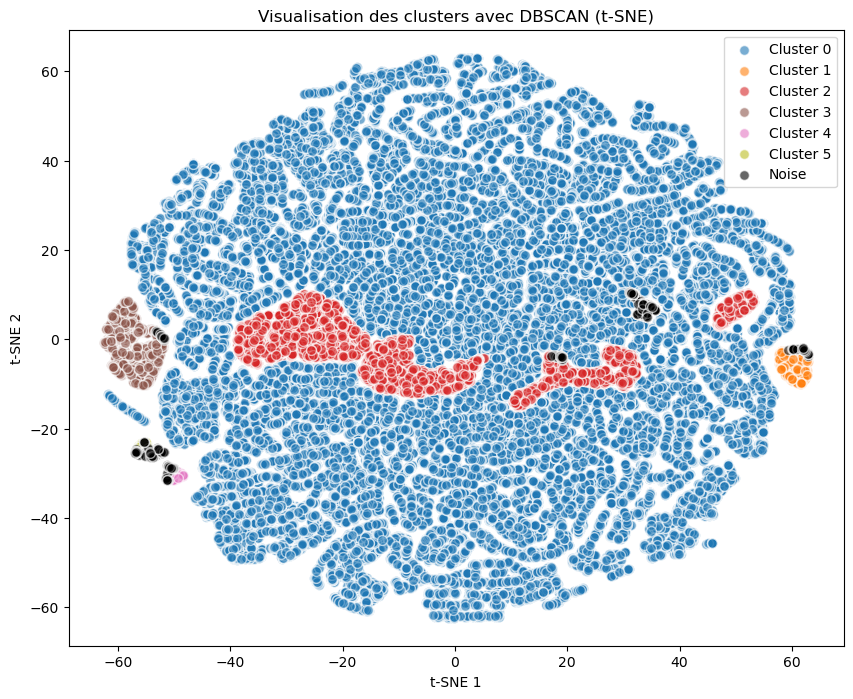

In [35]:
# Appliquer directement t-SNE sur les données
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Créer un scatter plot des clusters
plt.figure(figsize=(10, 8))
unique_clusters = set(clusters)
colors = [plt.cm.get_cmap('tab10')(each) for each in np.linspace(0, 1, len(unique_clusters))]

for cluster, color in zip(unique_clusters, colors):
    if cluster == -1:  # Bruit
        color = 'k'  # Noir pour le bruit
    plt.scatter(X_tsne[clusters == cluster, 0], X_tsne[clusters == cluster, 1], 
                s=50, c=[color], label=f'Cluster {cluster}' if cluster != -1 else 'Noise', alpha=0.6, edgecolors='w')

plt.title('Visualisation des clusters avec DBSCAN (t-SNE)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()

C:\Users\SOUKA\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\SOUKA\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\SOUKA\AppData\Local\Temp\ipykernel_13996\1318598254.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = [plt.cm.get_cmap('tab10')(each) for each in np.linspace(0, 1, len(unique_clusters))]


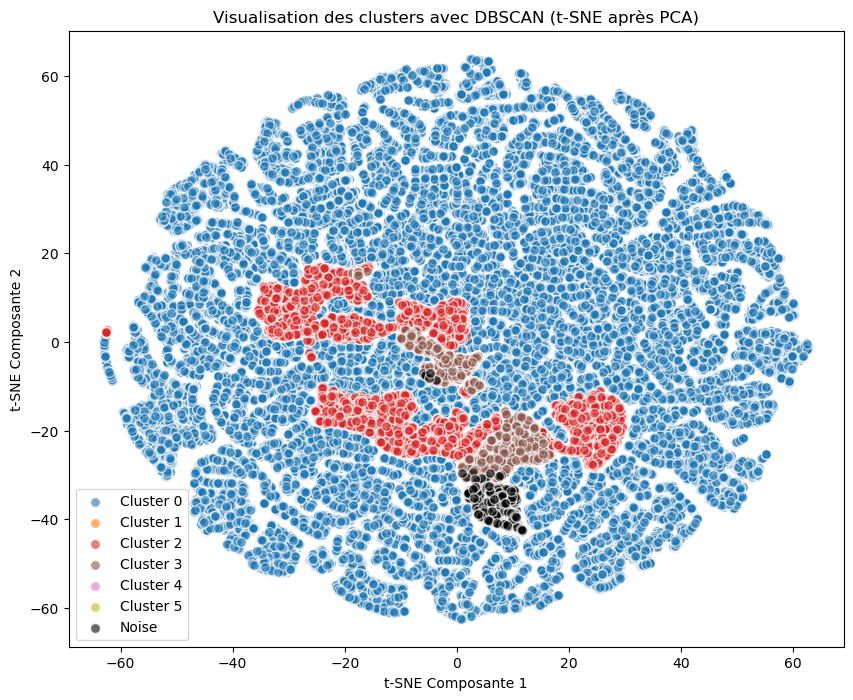

In [31]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Supposons que 'X_scaled' est votre DataFrame standardisé

# Réduire les données à 2 dimensions avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Réduire encore la dimensionnalité avec t-SNE (après PCA)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Créer un scatter plot des clusters
plt.figure(figsize=(10, 8))
unique_clusters = set(clusters)
colors = [plt.cm.get_cmap('tab10')(each) for each in np.linspace(0, 1, len(unique_clusters))]

for cluster, color in zip(unique_clusters, colors):
    if cluster == -1:  # Bruit
        color = 'k'  # Noir pour le bruit
    plt.scatter(X_tsne[clusters == cluster, 0], X_tsne[clusters == cluster, 1], 
                s=50, c=[color], label=f'Cluster {cluster}' if cluster != -1 else 'Noise', alpha=0.6, edgecolors='w')

plt.title('Visualisation des clusters avec DBSCAN (t-SNE après PCA)')
plt.xlabel('t-SNE Composante 1')
plt.ylabel('t-SNE Composante 2')
plt.legend()
plt.show()

In [37]:
# Calculer les moyennes des features pour chaque cluster (ignorer le bruit)
numeric_columns = rfm.select_dtypes(include=[np.number]).columns
cluster_means = rfm[rfm['cluster'] != -1].groupby('cluster')[numeric_columns].mean()
print(cluster_means)

            recency  frequency    monetary  customer_id_encoded  cluster
cluster                                                                 
0        288.566646        1.0  125.961454         48239.265934      0.0
1        292.814541        4.0  225.830524         46214.681093      1.0
2        291.188898        2.0  160.053929         48566.342666      2.0
3        282.174501        3.0  202.030261         47934.381028      3.0
4        245.523782        5.0  214.839773         43701.000000      4.0
5        209.942815        6.0  218.185140         50082.700935      5.0


### 3.3 Clustering avec CAH 

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [3]:
# Charger les données
rfm = pd.read_csv('rfm_results.csv')

In [5]:
# Sélectionner les colonnes RFM pour le clustering
X = rfm[['recency', 'frequency', 'monetary']]

In [7]:
# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Échantillonner les données (par exemple, 50% des données)
sample_size = int(0.5 * len(X_scaled))
X_sample = X_scaled[np.random.choice(X_scaled.shape[0], sample_size, replace=False), :]

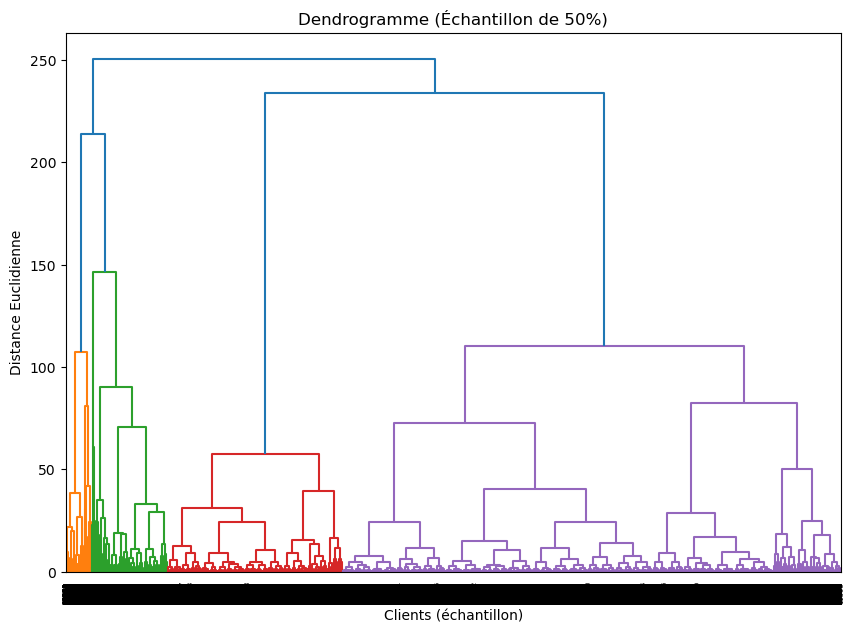

In [11]:
# Visualiser le Dendrogramme pour l'échantillon
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_sample, method='ward'))
plt.title('Dendrogramme (Échantillon de 50%)')
plt.xlabel('Clients (échantillon)')
plt.ylabel('Distance Euclidienne')
plt.show()

In [13]:
# Appliquer le clustering sur l'échantillon
cah = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clusters_sample = cah.fit_predict(X_sample)

In [15]:
# Créer une nouvelle colonne pour stocker les clusters dans le DataFrame échantillonné
rfm_sample = rfm.iloc[:sample_size].copy()  # Suppose que l'échantillon correspond aux premières lignes
rfm_sample['cluster'] = clusters_sample

print(rfm_sample.head())

                        customer_id     recency  frequency  monetary  cluster
0  00012a2ce6f8dcda20d059ce98491703  337.056852          1     89.80        0
1  000161a058600d5901f007fab4c27140  458.326227          1     54.90        0
2  0001fd6190edaaf884bcaf3d49edf079  596.266377          1    179.99        0
3  0002414f95344307404f0ace7a26f1d5  427.181227          1    149.90        2
4  000379cdec625522490c315e70c7a9fb  198.158345          1     93.00        0


In [17]:
# Optionnel: Afficher la répartition des clients dans les clusters
print(rfm_sample['cluster'].value_counts())

cluster
0    31032
2    10879
3     4452
1     1654
4      222
Name: count, dtype: int64


In [19]:
# Réduire les dimensions des données de l'échantillon à 2D avec PCA pour la visualisation
pca = PCA(n_components=2)
X_sample_pca = pca.fit_transform(X_sample)

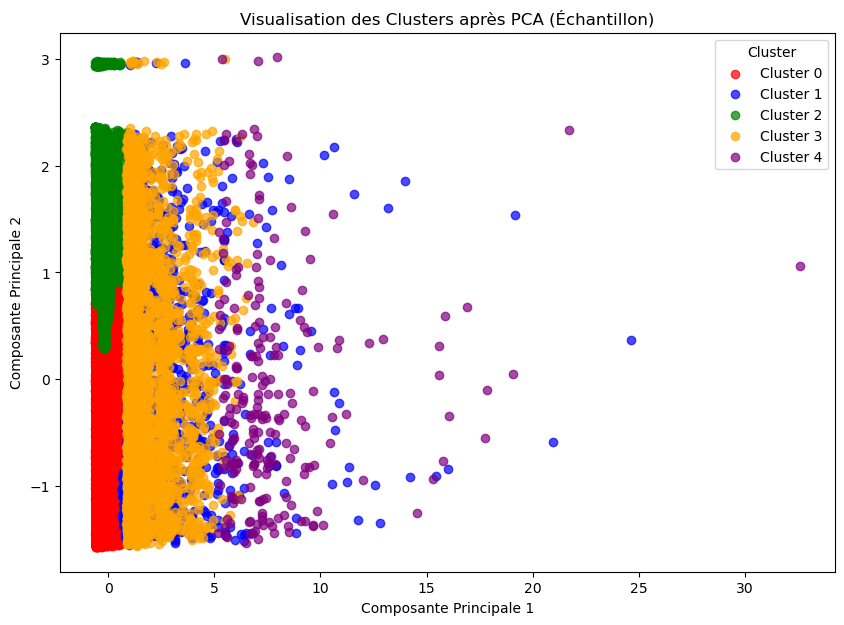

In [25]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Créer une liste de couleurs distinctes pour les clusters
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

# Visualiser les clusters en 2D sans échelle de couleurs
plt.figure(figsize=(10, 7))

# Utiliser les couleurs spécifiques pour chaque cluster
for i in range(len(set(clusters_sample))):
    plt.scatter(X_sample_pca[clusters_sample == i, 0], X_sample_pca[clusters_sample == i, 1], 
                color=colors[i], alpha=0.7, label=f'Cluster {i}')

plt.title('Visualisation des Clusters après PCA (Échantillon)')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')

# Ajouter une légende pour identifier les clusters
plt.legend(title='Cluster')
plt.show()

C:\Users\SOUKA\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\SOUKA\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


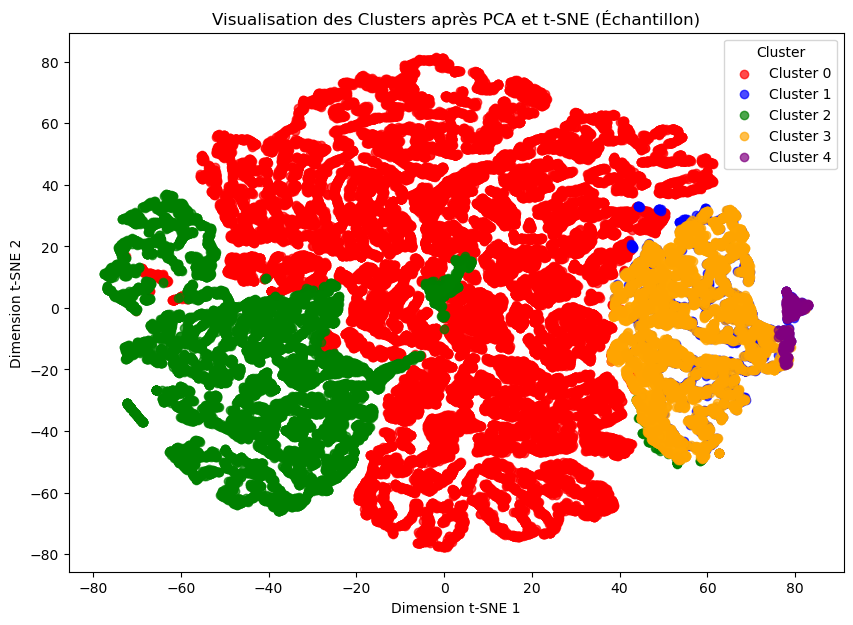

In [23]:
# Si X_sample a déjà une dimension suffisante, vous pouvez passer cette étape
pca = PCA(n_components=2)  # Réduction à 50 dimensions, ajustez si nécessaire
X_sample_pca = pca.fit_transform(X_sample)

# Étape 2: Réduction supplémentaire avec t-SNE
tsne = TSNE(n_components=2, random_state=0)  # Réduction à 2 dimensions pour la visualisation
X_sample_tsne = tsne.fit_transform(X_sample_pca)

# Créer une liste de couleurs distinctes pour les clusters (vous avez 5 clusters)
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Visualiser les clusters en 2D avec t-SNE
plt.figure(figsize=(10, 7))

# Utiliser les couleurs spécifiques pour chaque cluster
for i in range(5):  # Vous avez 5 clusters
    plt.scatter(X_sample_tsne[clusters_sample == i, 0], X_sample_tsne[clusters_sample == i, 1], 
                color=colors[i], alpha=0.7, label=f'Cluster {i}')

plt.title('Visualisation des Clusters après PCA et t-SNE (Échantillon)')
plt.xlabel('Dimension t-SNE 1')
plt.ylabel('Dimension t-SNE 2')

# Ajouter une légende pour identifier les clusters
plt.legend(title='Cluster')
plt.show()

In [27]:
# Evaluer la qualité de clustering CAH

# Importer les métriques nécessaires
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculer les scores
silhouette_avg = silhouette_score(X_sample, clusters_sample)
davies_bouldin_avg = davies_bouldin_score(X_sample, clusters_sample)
calinski_harabasz_avg = calinski_harabasz_score(X_sample, clusters_sample)

# Afficher les scores
print(f"Score de silhouette moyen pour CAH : {silhouette_avg}")
print(f"Indice de Davies-Bouldin pour CAH: {davies_bouldin_avg}")
print(f"Indice de Calinski-Harabasz pour CAH : {calinski_harabasz_avg}")

Score de silhouette moyen pour CAH : 0.46320104038344406
Indice de Davies-Bouldin pour CAH: 0.7668928353807709
Indice de Calinski-Harabasz pour CAH : 22074.959717665635


### Comparaison entre K-means, DBSCAN et CAH

** Conclusions **
*****

Les métriques de qualité entre les 3 méthodes de clustering, K-means, DBSCAN et CAH :

Score de silhouette : mesure de la cohésion interne des clusters.

Coefficient de Davies-Bouldin : mesure de la séparation des clusters.

Index de Calinski-Harabasz : ratio de la somme de la dispersion intra-cluster et inter-cluster.
  
Score de silhouette pour K-means: 0.4780712675031295 

Coefficient de Davies-Bouldin pour K-means: 0.7279700322644947

Index de Calinski-Harabasz pour K-means: 76435.97588748336 

Score de silhouette pour DBSCAN: 0.32469202136617126

Coefficient de Davies-Bouldin pour DBSCAN: 1.3983565285509683

Index de Calinski-Harabasz pour DBSCAN: 3435.39495903765  

Score de silhouette moyen pour CAH : 0.46320104038344406

Indice de Davies-Bouldin pour CAH: 0.7668928353807709

Indice de Calinski-Harabasz pour CAH : 22074.959717665635


Pour interpréter et comparer les résultats des différentes métriques de qualité de clustering pour les algorithmes K-means, DBSCAN et CAH (Classification Ascendante Hiérarchique), examinons chaque métrique en relation avec les valeurs fournies :

1. Score de Silhouette
   
K-means : 0.478

DBSCAN : 0.325

CAH : 0.463

Interprétation :

K-means a le score de silhouette le plus élevé (0.478), ce qui indique une meilleure cohésion et séparation des clusters comparé aux autres méthodes.
CAH (0.463) est assez proche de K-means, ce qui suggère également une bonne qualité des clusters, mais légèrement inférieure à celle de K-means.
DBSCAN a le score de silhouette le plus bas (0.325), ce qui indique que les clusters peuvent être moins bien définis, avec une moins bonne cohésion et séparation.

2. Coefficient de Davies-Bouldin
   
K-means : 0.728

DBSCAN : 1.398

CAH : 0.767

Interprétation :

K-means a le plus bas coefficient de Davies-Bouldin (0.728), ce qui suggère une meilleure séparation entre les clusters et une meilleure compacité au sein des clusters.

CAH (0.767) est proche de K-means, indiquant une qualité de clustering similaire.

DBSCAN a le coefficient le plus élevé (1.398), ce qui suggère une qualité de clustering inférieure avec une moins bonne séparation entre les clusters et une moins bonne compacité.

3. Index de Calinski-Harabasz
   
K-means : 76436

DBSCAN : 3435

CAH : 22075

Interprétation :

K-means a le plus élevé index de Calinski-Harabasz (76436), indiquant une séparation et une compacité supérieures des clusters.
CAH (22075) est également assez élevé, mais inférieur à K-means, suggérant une bonne qualité mais moins bonne que celle de K-means.
DBSCAN a l'index le plus bas (3435), indiquant que les clusters ne sont pas aussi bien séparés ni aussi compacts comparé aux autres méthodes.

Résumé des Comparaisons :

K-means :

Meilleur score de silhouette et coefficient de Davies-Bouldin le plus bas.

Index de Calinski-Harabasz le plus élevé.

En général, K-means semble offrir la meilleure qualité de clustering selon ces métriques.

CAH :

Score de silhouette et coefficient de Davies-Bouldin assez proches de ceux de K-means.

Index de Calinski-Harabasz beaucoup plus bas que K-means.

Indique une bonne qualité de clustering mais légèrement inférieure à K-means.

DBSCAN :

Score de silhouette le plus bas, coefficient de Davies-Bouldin le plus élevé, et index de Calinski-Harabasz le plus bas.
Suggère que DBSCAN pourrait ne pas être aussi performant que K-means et CAH pour cette tâche spécifique, possiblement en raison de son incapacité à bien séparer les clusters ou à gérer le bruit dans les données.

En conclusion, K-means semble être le meilleur choix pour cette tâche de clustering selon les métriques de qualité utilisées. CAH est également une bonne option, tandis que DBSCAN montre des résultats moins satisfaisants. Cela pourrait être dû à la sensibilité de DBSCAN aux paramètres comme la densité des clusters et la gestion du bruit.

### Interprétation des clusters d'un point de vue métier
1) Analyser les centroides des clusters :
- Les centroides des clusters peuvent être interprétés comme les "profils types" des segments obtenus.
- Identifiez les caractéristiques principales de chaque cluster.

In [25]:
# Sans ACP

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Supposons que 'X' est votre DataFrame d'origine
X = rfm[['recency', 'frequency', 'monetary']]

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering K-means
kmeans_optimized = KMeans(n_clusters=3, random_state=42)
kmeans_optimized.fit(X_scaled)

# Centroides des clusters
centroids = kmeans_optimized.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=X.columns)

print("Centroides des clusters :")
print(centroids_df)

Centroides des clusters :
    recency  frequency  monetary
0  0.976706  -0.123726 -0.103287
1 -0.723421  -0.130162 -0.109941
2 -0.033731   2.963620  2.491135


** Interprétation **
*******
  L'analyse des centroides des clusters nous permet de comprendre les caractéristiques principales des différents segments de notre clientèle, en identifiant les "profils types" associés à chaque cluster. Voici comment interpréter les résultats que nous avons obtenus :

1. Comprendre les variables :

Recency : Nombre de jours depuis la dernière interaction ou achat du client.

Frequency : Nombre total d'achats ou d'interactions effectués par le client.

Monetary : Montant total dépensé par le client.

2. Interprétation des centroides :
   
Les valeurs des centroides sont standardisées (moyenne = 0, écart-type = 1). Voici comment interpréter chaque cluster :

Cluster 0 :

Recency : 0.976706 (Positif et élevé) -> Les clients de ce cluster ont une récence élevée. Ils ont fait un achat ou une interaction plus récemment que la moyenne des clients.

Frequency : -0.123726 (Proche de 0) -> La fréquence des achats est proche de la moyenne, ce qui indique une fréquence normale des interactions.

Monetary : -0.103287 (Proche de 0) -> Le montant dépensé est proche de la moyenne des clients.

Interprétation : Ce cluster représente des clients qui ont effectué un achat ou une interaction récemment, avec une fréquence d'achat et un montant dépensé proches de la moyenne. Ils pourraient être des clients récents ou réguliers sans comportement d'achat exceptionnel.

Cluster 1 :

Recency : -0.723421 (Négatif et bas) -> Les clients de ce cluster ont une récence faible. Ils n'ont pas interagi ou acheté récemment, par rapport à la moyenne.

Frequency : -0.130162 (Proche de 0) -> La fréquence des achats est également proche de la moyenne.

Monetary : -0.109941 (Proche de 0) -> Le montant dépensé est proche de la moyenne.

Interprétation : Ce cluster représente des clients qui n'ont pas interagi ou acheté récemment, mais dont le comportement d'achat (fréquence et montant dépensé) reste dans la moyenne. Ce segment pourrait inclure des clients inactifs ou en phase de désengagement.

Cluster 2 :

Recency : -0.033731 (Proche de 0) -> La récence est proche de la moyenne.

Frequency : 2.963620 (Très élevé) -> Les clients de ce cluster ont une fréquence d'achat très élevée.

Monetary : 2.491135 (Très élevé) -> Le montant dépensé est également très élevé.

Interprétation : Ce cluster représente des clients extrêmement actifs, avec une fréquence d'achat et un montant dépensé bien supérieurs à la moyenne. Ce segment pourrait correspondre à nos meilleurs clients ou à ceux qui sont les plus engagés.

3. Deductions Métiers :

Cluster 0 (Clients récents et réguliers) : Ce segment pourrait être ciblé par des offres pour les inciter à continuer leurs achats et renforcer leur fidélité.

Cluster 1 (Clients inactifs ou en désengagement) : Ce segment pourrait nécessiter une relance pour réactiver leur engagement, par exemple via des campagnes de marketing spécifiques (offres promotionnelles, emails de réengagement).

Cluster 2 (Meilleurs clients) : Ces clients devraient être valorisés par des offres exclusives ou des programmes de fidélité pour maintenir leur engagement et les remercier pour leur contribution significative.

En résumé, les centroides des clusters Nous permettent de segmenter Nos clients en groupes distincts avec des comportements d'achat spécifiques, facilitant ainsi des stratégies de marketing et de fidélisation ciblées.

C:\Users\SOUKA\AppData\Local\Temp\ipykernel_2620\2805109373.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = clusters


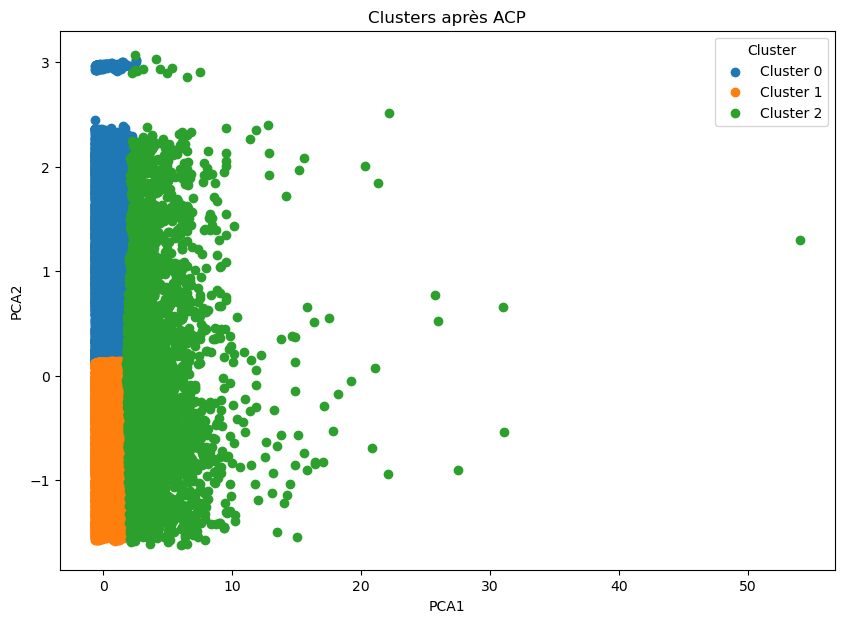

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Supposons que 'X' est votre DataFrame d'origine
X = rfm[['recency', 'frequency', 'monetary']]

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering K-means
kmeans_optimized = KMeans(n_clusters=3, random_state=42)
clusters = kmeans_optimized.fit_predict(X_scaled)

# Ajouter les étiquettes de clusters aux données d'origine
X['Cluster'] = clusters

# Appliquer l'ACP sur les données d'origine sans les étiquettes de clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Créer un DataFrame pour les résultats ACP avec les étiquettes de clusters
X_pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
X_pca_df['Cluster'] = clusters

# Visualiser les clusters après l'ACP
plt.figure(figsize=(10, 7))
for cluster in np.unique(clusters):
    plt.scatter(X_pca_df[X_pca_df['Cluster'] == cluster]['PCA1'], 
                X_pca_df[X_pca_df['Cluster'] == cluster]['PCA2'], 
                label=f'Cluster {cluster}')
    
plt.title('Clusters après ACP')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Supposons que 'X' est votre DataFrame d'origine
X = rfm[['recency', 'frequency', 'monetary']]

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering K-means
kmeans_optimized = KMeans(n_clusters=3, random_state=42)
clusters = kmeans_optimized.fit_predict(X_scaled)

# Appliquer l'ACP sur les données standardisées
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Ajouter les étiquettes de clusters au DataFrame PCA
X_pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
X_pca_df['Cluster'] = clusters

# Calculer les centroides des clusters dans l'espace PCA
centroids_pca = X_pca_df.groupby('Cluster').mean()

print("Centroides des clusters dans l'espace PCA :")
print(centroids_pca)

Centroides des clusters dans l'espace PCA :
             PCA1      PCA2
Cluster                    
0       -0.163117  0.976440
1       -0.168202 -0.723538
2        3.853686 -0.030079


Interprétation des Composantes Principales

Les résultats obtenus après l'application du clustering et de l'Analyse en Composantes Principales (ACP) peuvent être interprétés comme suit :

1. Clusters dans l'Espace Réduit (PCA) :
   
Les coordonnées des centroides dans l'espace des composantes principales (PCA) montrent la position moyenne des points pour chaque cluster sur les deux premières composantes principales.

Cluster 0 :
PCA1 : -0.163117
PCA2 : 0.976440

Interprétation : Le Cluster 0 est caractérisé par une valeur légèrement négative sur la première composante principale (PCA1) et une valeur élevée sur la deuxième composante principale (PCA2). Cela suggère que les clients dans ce cluster se distinguent principalement par les caractéristiques représentées par la deuxième composante.

Cluster 1 :
PCA1 : -0.168202
PCA2 : -0.723538

Interprétation : Le Cluster 1 a des valeurs négatives sur les deux composantes principales, mais surtout sur PCA2. Ce cluster est donc situé de manière opposée au Cluster 0 le long de PCA2, indiquant que les clients de ce groupe ont des caractéristiques opposées à ceux du Cluster 0 sur cette composante.

Cluster 2 :
PCA1 : 3.853686
PCA2 : -0.030079

Interprétation : Le Cluster 2 se distingue fortement par une valeur très élevée sur la première composante principale (PCA1) et presque neutre sur PCA2. Ce cluster est bien séparé des autres, ce qui signifie que les clients de ce groupe sont particulièrement différents en ce qui concerne les caractéristiques capturées par PCA1.

2. Interprétations Générales :
 
PCA1 vs PCA2 :

PCA1 semble jouer un rôle crucial dans la différenciation du Cluster 2 des autres clusters. Les clients de ce cluster ont des comportements ou des caractéristiques qui sont extrêmement marqués par la composante principale 1.
PCA2 différencie principalement les Clusters 0 et 1, les plaçant dans des directions opposées.
Séparation des Clusters :

Le fait que le Cluster 2 ait une valeur très élevée sur PCA1 suggère qu'il est nettement distinct, avec des caractéristiques très différentes. Les autres clusters (0 et 1) se distinguent plus subtilement, principalement le long de PCA2.
Conclusion :
Les centroides dans l'espace PCA montrent que le Cluster 2 est très distinct, probablement regroupant des clients avec des comportements ou des caractéristiques extrêmes par rapport aux autres clusters. Les Clusters 0 et 1 sont plus similaires entre eux mais diffèrent principalement sur la dimension capturée par PCA2. 

### Associer les clusters à des catégories métiers :
Donnez un nom ou une description à chaque cluster en fonction des valeurs des centroides.
Par exemple, si vous segmentez des clients, un cluster pourrait représenter des "Clients Premium" tandis qu'un autre représente des "Clients à faible valeur".

In [47]:
import pandas as pd

# Supposons que column_names contient les noms des colonnes d'origine
column_names = ["recency", "frequency", "monetary"]  # Remplacez par vos colonnes réelles

# Centroides des clusters (extrait de votre exemple)
centroids =    [
    [0.976706 , -0.123726, -0.103287],
    [-0.723421, -0.130162, -0.109941],
    [-0.033731, 2.963620, 2.491135]
]

# Exemple d'association des clusters à des catégories métiers
cluster_descriptions = {
    0: "Clients Premium",
    1: "Clients à faible valeur",
    2: "Clients à potentiel de croissance"
}

# Création d'un DataFrame pour les centroides
centroids_df = pd.DataFrame(centroids, columns=column_names)

# Ajouter les descriptions des clusters aux données des centroides
centroids_df['Cluster'] = centroids_df.index
centroids_df['Description'] = centroids_df['Cluster'].map(cluster_descriptions)

print("Centroides des clusters avec descriptions :")
print(centroids_df)

Centroides des clusters avec descriptions :
    recency  frequency  monetary  Cluster                        Description
0  0.976706  -0.123726 -0.103287        0                    Clients Premium
1 -0.723421  -0.130162 -0.109941        1            Clients à faible valeur
2 -0.033731   2.963620  2.491135        2  Clients à potentiel de croissance


** Interprétation des résultats **
********

Les résultats que nous avons obtenus montrent comment les trois clusters identifiés par l'algorithme de clustering peuvent être associés à des catégories métiers, permettant ainsi une segmentation utile et exploitable pour des actions marketing ou commerciales. 
Voici comment nous pourrions interpréter les résultats et ce que nous pouvons en déduire :

Interprétation des Centroides et des Descriptions de Clusters

Cluster 0 : Clients Premium

Caractéristiques :

Recency : 0.976706 (élevée) - Ces clients ont une valeur élevée sur l'échelle de recency, ce qui signifie qu'ils ont acheté récemment.

Frequency : -0.123726 (légèrement négative) - Leur fréquence d'achat n'est pas particulièrement élevée.

Monetary : -0.103287 (légèrement négative) - Ils ne dépensent pas énormément.

Interprétation :

Bien qu'ils aient récemment acheté, ces clients ne sont pas des acheteurs fréquents ni de gros dépensiers. Cependant, leur récente activité pourrait indiquer une tendance à devenir plus actifs. Ils sont qualifiés de "Clients Premium" en raison de leur récente activité, suggérant qu'ils sont engagés ou potentiellement intéressés par de nouveaux achats.

Cluster 1 : Clients à faible valeur

Caractéristiques :

Recency : -0.723421 (faible) - Ces clients ont acheté il y a longtemps.

Frequency : -0.130162 (légèrement négative) - Ils n'achètent pas souvent.

Monetary : -0.109941 (légèrement négative) - Ils dépensent peu.

Interprétation :

Ces clients sont moins actifs, achètent rarement, et dépensent peu lorsqu'ils le font. Ils peuvent être considérés comme des clients à faible valeur pour l'entreprise. Ces clients nécessitent peut-être des stratégies de réengagement pour augmenter leur activité.

Cluster 2 : Clients à potentiel de croissance

Caractéristiques :

Recency : -0.033731 (presque neutre) - Ces clients n'ont pas acheté récemment, mais pas il y a très longtemps non plus.

Frequency : 2.963620 (très élevée) - Ils achètent très fréquemment.

Monetary : 2.491135 (très élevée) - Ils dépensent beaucoup.

Interprétation :

Ce sont des clients qui, bien qu'ils n'aient pas acheté très récemment, ont montré une très forte fréquence d'achat et une valeur monétaire élevée. Ils représentent une opportunité majeure pour l'entreprise car ils ont déjà montré une forte activité d'achat. Ces clients pourraient être ciblés pour des offres spéciales ou des programmes de fidélité afin de maintenir leur engagement et les inciter à continuer à dépenser.

Conclusions et Dérivations

Segmentation Efficace : La segmentation basée sur ces clusters permet à l'entreprise de mieux comprendre les différents types de clients qu'elle possède. En attribuant une description métier à chaque cluster, l'entreprise peut concevoir des stratégies spécifiques pour répondre aux besoins et comportements de chaque segment.

Stratégies Marketing Personnalisées :

Clients Premium : Ils pourraient être réceptifs à des offres exclusives ou à des programmes de fidélité pour renforcer leur engagement.

Clients à faible valeur : Ils nécessitent des efforts de réactivation, comme des promotions ou des campagnes de réengagement.

Clients à potentiel de croissance : Ils peuvent être ciblés par des stratégies visant à maintenir ou à augmenter leur niveau d'engagement actuel, comme des offres VIP ou des récompenses pour fidélité.

Optimisation des Ressources : En se concentrant sur les "Clients à potentiel de croissance", l'entreprise peut maximiser son retour sur investissement en concentrant ses efforts sur les clients les plus susceptibles d'apporter une valeur élevée à long terme.

En résumé, cette approche nous permet de segmenter nos clients de manière significative et d'adapter nos stratégies en fonction des comportements spécifiques identifiés par les centroides des clusters.

C:\Users\SOUKA\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\SOUKA\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\SOUKA\AppData\Local\Temp\ipykernel_13996\1645613202.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = kmeans_labels_optimized
C:\Users\SOUKA\AppData\Local\Temp\ipykernel_13996\1645613202.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

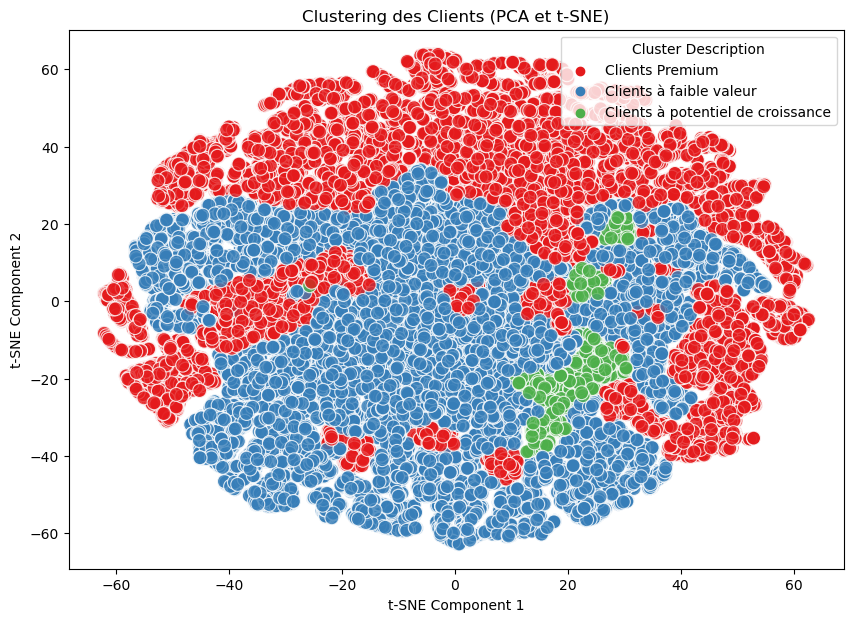

In [46]:
# Avec PCA et t-sne

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Supposons que 'X' est votre DataFrame d'origine
X = rfm[['recency', 'frequency', 'monetary']]

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer le clustering K-means sur les données standardisées
kmeans_optimized = KMeans(n_clusters=3, random_state=42)
kmeans_labels_optimized = kmeans_optimized.fit_predict(X_scaled)

# Ajouter les labels des clusters aux données standardisées
X_scaled_with_clusters = np.column_stack((X_scaled, kmeans_labels_optimized))

# Appliquer l'ACP pour réduire la dimensionnalité à 2 composants
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_with_clusters)

# Appliquer t-SNE sur les données réduites par l'ACP
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Ajouter les labels des clusters aux données originales
X['Cluster'] = kmeans_labels_optimized

# Exemple d'association des clusters à des catégories métiers
cluster_descriptions = {
    0: "Clients Premium",
    1: "Clients à faible valeur",
    2: "Clients à potentiel de croissance"
}

# Ajouter les descriptions des clusters aux données
X['Description'] = X['Cluster'].map(cluster_descriptions)

# Visualisation des clusters avec t-SNE
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue='Description', data=X, palette='Set1', s=100, alpha=0.8)
plt.title('Clustering des Clients (PCA et t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster Description')
plt.show()

C:\Users\SOUKA\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\SOUKA\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\SOUKA\AppData\Local\Temp\ipykernel_2620\2398706319.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = kmeans_labels_optimized
C:\Users\SOUKA\AppData\Local\Temp\ipykernel_2620\2398706319.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

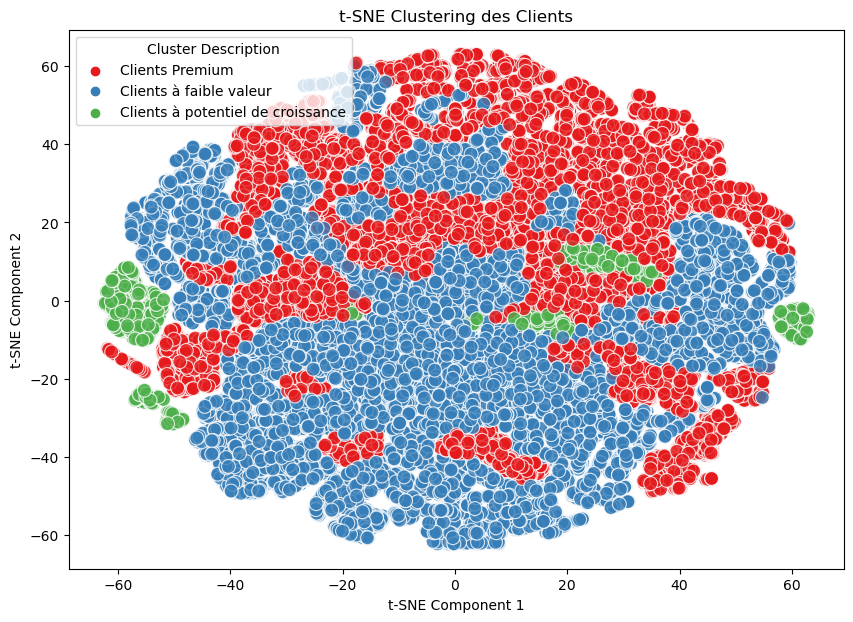

In [52]:
# avec t-sne

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Supposons que 'X' est votre DataFrame d'origine
X = rfm[['recency', 'frequency', 'monetary']]

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer le clustering K-means sur les données standardisées
kmeans_optimized = KMeans(n_clusters=3, random_state=42)
kmeans_labels_optimized = kmeans_optimized.fit_predict(X_scaled)

# Appliquer t-SNE sur les données standardisées
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Ajouter les labels des clusters aux données originales
X['Cluster'] = kmeans_labels_optimized

# Exemple d'association des clusters à des catégories métiers
cluster_descriptions = {
    0: "Clients Premium",
    1: "Clients à faible valeur",
    2: "Clients à potentiel de croissance"
}

# Ajouter les descriptions des clusters aux données
X['Description'] = X['Cluster'].map(cluster_descriptions)

# Visualisation des clusters avec t-SNE
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue='Description', data=X, palette='Set1', s=100, alpha=0.8)
plt.title('t-SNE Clustering des Clients')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster Description')
plt.show()

C:\Users\SOUKA\AppData\Local\Temp\ipykernel_2620\1051726954.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = kmeans_labels_optimized
C:\Users\SOUKA\AppData\Local\Temp\ipykernel_2620\1051726954.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Description'] = X['Cluster'].map(cluster_descriptions)


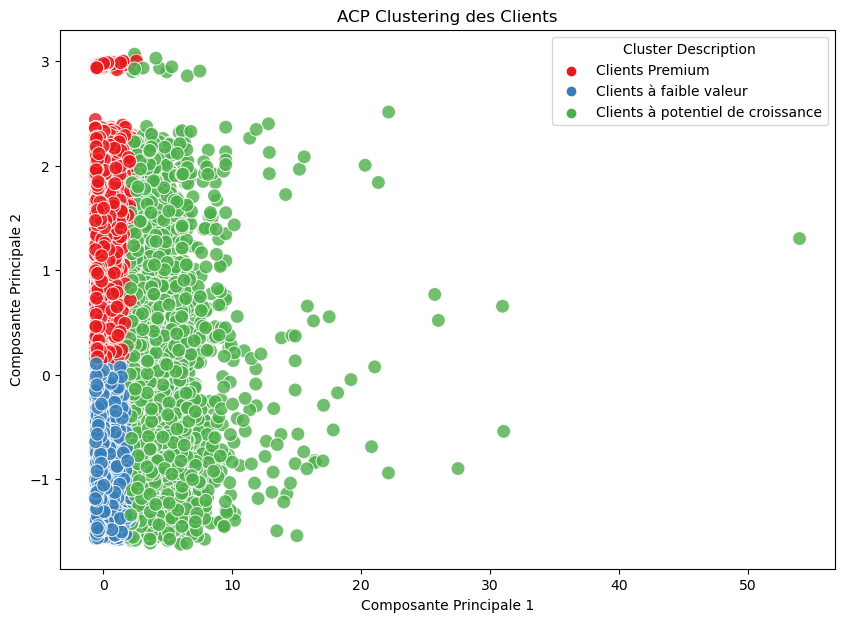

In [54]:
# avec ACP

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Supposons que 'X' est votre DataFrame d'origine
X = rfm[['recency', 'frequency', 'monetary']]

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer le clustering K-means sur les données standardisées
kmeans_optimized = KMeans(n_clusters=3, random_state=42)
kmeans_labels_optimized = kmeans_optimized.fit_predict(X_scaled)

# Appliquer l'ACP pour réduire la dimensionnalité à 2 composants
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Ajouter les labels des clusters aux données originales
X['Cluster'] = kmeans_labels_optimized

# Exemple d'association des clusters à des catégories métiers
cluster_descriptions = {
    0: "Clients Premium",
    1: "Clients à faible valeur",
    2: "Clients à potentiel de croissance"
}

# Ajouter les descriptions des clusters aux données
X['Description'] = X['Cluster'].map(cluster_descriptions)

# Visualisation des clusters avec ACP
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue='Description', data=X, palette='Set1', s=100, alpha=0.8)
plt.title('ACP Clustering des Clients')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.legend(title='Cluster Description')
plt.show()